In [1]:
import numpy as np
import mylibrary.nnlib as tnn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
# x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

In [3]:
# linear regression
X = np.c_[x, np.ones(len(x))]
# Y = X@W
W = np.linalg.pinv(X)@y
W

array([ 1.06779028, -0.39887649])

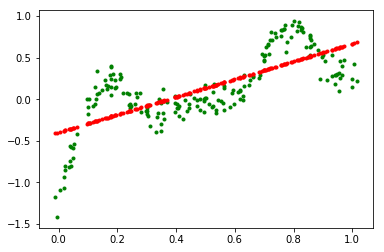

In [4]:
Y = X@W
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')

In [5]:
loss0 = tnn.MseLoss.loss(Y, y)
loss0

0.044245480817384705

## Trying for Leaky Relu activation function

In [6]:
class LeakyRelu(tnn.Layer):
    def __init__(self, alpha=0.01, ):
        tnn.layerList.append(self)
        self.x = None
        self.y = None
        self.alpha = alpha

    def forward(self, x):
        self.x = x
        toret = np.maximum(self.alpha * x, x)
        return toret

    def backward(self, y):
        self.y = y
        toret = np.minimum(y/self.alpha, y)
        return toret

In [13]:
class Sigmoid(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None
        self.y = None

    def forward(self, x):
        self.x = x
        toret = 1 / (1 + np.exp(-x))
        return toret

    def backward(self, y):
        self.y = y
        return self.logit_(y)
    
    def logit_(self, x, epsilon = 1e-3):
        x = x.clip(min = epsilon, max=1-epsilon)
        return np.log(x / (1-x))

In [16]:
class Tanh(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None
        self.y = None

    def forward(self, x):
        self.x = x
        toret = np.tanh(x)
        return toret

    def backward(self, y, epsilon = 1e-3):
        self.y = y
        y = y.clip(min = epsilon, max=1-epsilon)
        return np.arctanh(y)

[ 7.20866417 -6.71421089]


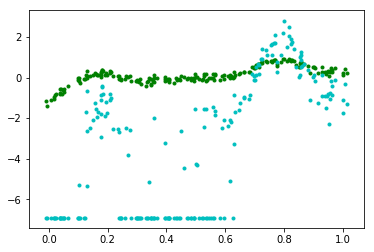

In [19]:
# leaky relu regression
X = np.c_[x, np.ones(len(x))]
# Y = _/ (X@W)
# actf = LeakyRelu(alpha=0.1)
# actf = Tanh()
actf = Sigmoid()

z = actf.backward(y)
W = np.linalg.pinv(X)@z
print(W)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, z, marker='.', color='c')

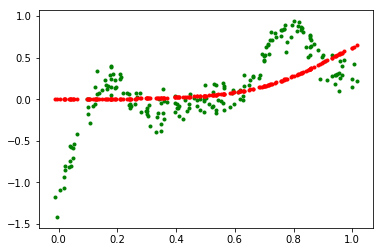

In [20]:
Y = actf.forward(X@W)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')

In [21]:
loss1 = tnn.MseLoss.loss(Y, y)
loss1

0.06516493721148063

_______________________
epoch 0
Loss 0.2396191778842686


_______________________
epoch 10
Loss 0.22363420833165082


_______________________
epoch 20
Loss 0.2076164443902953


_______________________
epoch 30
Loss 0.191831773458269


_______________________
epoch 40
Loss 0.17661330386484447


_______________________
epoch 50
Loss 0.1623185543321171


_______________________
epoch 60
Loss 0.14927439847628846


_______________________
epoch 70
Loss 0.13772494503871358


_______________________
epoch 80
Loss 0.12779642265416366


_______________________
epoch 90
Loss 0.11948851777534773


_______________________
epoch 100
Loss 0.11269255383426065


_______________________
epoch 110
Loss 0.1072273364046163


_______________________
epoch 120
Loss 0.10287907825860859


_______________________
epoch 130
Loss 0.09943427804138912


_______________________
epoch 140
Loss 0.09670058879674602


_______________________
epoch 150
Loss 0.09451624825284505


_______________________
epoch 160
Loss 0.



_______________________
epoch 1360
Loss 0.06173611378456128


_______________________
epoch 1370
Loss 0.06167745118760294


_______________________
epoch 1380
Loss 0.061619873064211704


_______________________
epoch 1390
Loss 0.061563357232011014


_______________________
epoch 1400
Loss 0.06150788202200566


_______________________
epoch 1410
Loss 0.06145342626586067


_______________________
epoch 1420
Loss 0.061399969283470524


_______________________
epoch 1430
Loss 0.06134749087081559


_______________________
epoch 1440
Loss 0.06129597128810293


_______________________
epoch 1450
Loss 0.061245391248187904


_______________________
epoch 1460
Loss 0.061195731905272555


_______________________
epoch 1470
Loss 0.06114697484387712


_______________________
epoch 1480
Loss 0.061099102068080204


_______________________
epoch 1490
Loss 0.061052095991023236


_______________________
epoch 1500
Loss 0.06100593942467473


_______________________
epoch 1510
Loss 0.06096061556984951





_______________________
epoch 2680
Loss 0.058737144981641266


_______________________
epoch 2690
Loss 0.05873145960997331


_______________________
epoch 2700
Loss 0.05872587695140224


_______________________
epoch 2710
Loss 0.05872039532234605


_______________________
epoch 2720
Loss 0.058715013066242445


_______________________
epoch 2730
Loss 0.05870972855306596


_______________________
epoch 2740
Loss 0.058704540178855194


_______________________
epoch 2750
Loss 0.05869944636525025


_______________________
epoch 2760
Loss 0.05869444555903973


_______________________
epoch 2770
Loss 0.058689536231717396


_______________________
epoch 2780
Loss 0.05868471687904799


_______________________
epoch 2790
Loss 0.05867998602064235


_______________________
epoch 2800
Loss 0.058675342199541125


_______________________
epoch 2810
Loss 0.058670783981807376


_______________________
epoch 2820
Loss 0.05866630995612747


_______________________
epoch 2830
Loss 0.05866191873342034






_______________________
epoch 4000
Loss 0.05846766664917002


_______________________
epoch 4010
Loss 0.05846735386329586


_______________________
epoch 4020
Loss 0.058467049646362304


_______________________
epoch 4030
Loss 0.058466753800137106


_______________________
epoch 4040
Loss 0.058466466130079324


_______________________
epoch 4050
Loss 0.058466186445287276


_______________________
epoch 4060
Loss 0.05846591455844674


_______________________
epoch 4070
Loss 0.05846565028578011


_______________________
epoch 4080
Loss 0.05846539344699583


_______________________
epoch 4090
Loss 0.0584651438652385


_______________________
epoch 4100
Loss 0.05846490136703958


_______________________
epoch 4110
Loss 0.05846466578226856


_______________________
epoch 4120
Loss 0.05846443694408474


_______________________
epoch 4130
Loss 0.05846421468888936


_______________________
epoch 4140
Loss 0.05846399885627854


_______________________
epoch 4150
Loss 0.05846378928899638


___



_______________________
epoch 5330
Loss 0.05845773019094965


_______________________
epoch 5340
Loss 0.0584577284830662


_______________________
epoch 5350
Loss 0.058457726866011


_______________________
epoch 5360
Loss 0.05845772533541152


_______________________
epoch 5370
Loss 0.0584577238870812


_______________________
epoch 5380
Loss 0.05845772251701275


_______________________
epoch 5390
Loss 0.05845772122137159


_______________________
epoch 5400
Loss 0.05845771999648954


_______________________
epoch 5410
Loss 0.05845771883885866


_______________________
epoch 5420
Loss 0.058457717745125294


_______________________
epoch 5430
Loss 0.058457716712084246


_______________________
epoch 5440
Loss 0.0584577157366732


_______________________
epoch 5450
Loss 0.058457714815967225


_______________________
epoch 5460
Loss 0.058457713947173494


_______________________
epoch 5470
Loss 0.05845771312762621


_______________________
epoch 5480
Loss 0.05845771235478156


_______

TclError: this isn't a Tk application

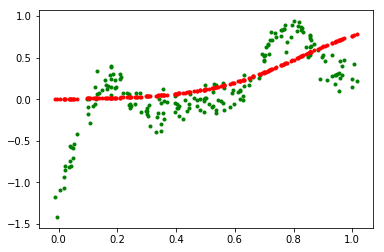

In [22]:
net1 = tnn.NonLinearLayer(1,1,activation=tnn.Sigmoid(), optimizer=tnn.Adam())

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = net1.forward(xx)
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
    
    dx = net1.backward(dy)
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, a1, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

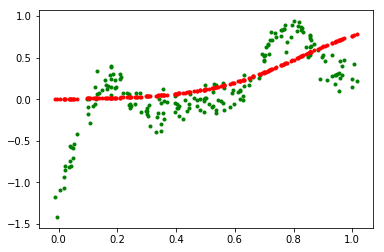

In [23]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='r')

(0.044245480817384705, 0.06516493721148063, 0.058457700645863364)

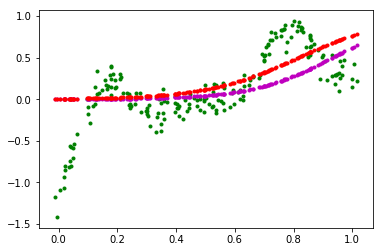

In [24]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='m')
plt.scatter(x, a1, marker='.', color='r')
loss2 = float(np.copy(loss))
loss0, loss1, loss2

In [25]:
print(W)
print(net1.weights, net1.bias)

[ 7.20866417 -6.71421089]
[[6.40914643]] [-5.22434451]


## recursive gradient for finding target

In [26]:
layer1 = tnn.LinearLayer(1,1, optimizer=tnn.Adam())
layer2 = tnn.Sigmoid()
net2 = tnn.AutoForm()
net2.layerList = [layer1, layer2]

In [36]:
z1 = layer1.forward(xx)
z1_ = np.copy(z1)
for i in range(5000):
    a1_ = layer2.forward(z1_)
    dy_ = tnn.MseLoss.del_loss(a1_, yy)
    dz1_ = layer2.backward(dy_)
    z1_ = z1_ - dz1_
tnn.MseLoss.loss(a1_, y)

0.13901514748998647

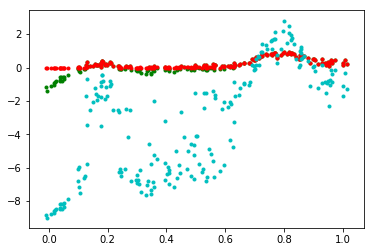

In [37]:
%matplotlib inline
a1_ = layer2.forward(z1_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [38]:
# X = np.c_[x, np.ones(len(x))]
# W = np.linalg.pinv(X)@z1_
# print(W)
# Y = layer2.forward(X@W)
# plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y, marker='.', color='r')

for i in range(50000):
    z1 = layer1.forward(xx)    
    dz1_ = tnn.MseLoss.del_loss(z1, z1_)
    layer1.backward(dz1_)
    layer1.update()
a1_ = net2.forward(xx)
loss3 = tnn.MseLoss.loss(a1_, yy)
loss3

0.06308687711008795

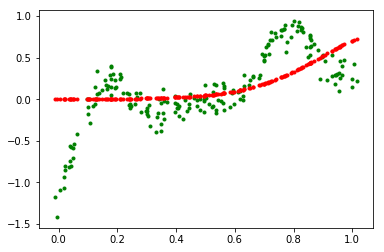

In [39]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
# plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [40]:
loss0, loss1, loss2, loss3

(0.044245480817384705,
 0.06516493721148063,
 0.058457700645863364,
 0.06308687711008795)

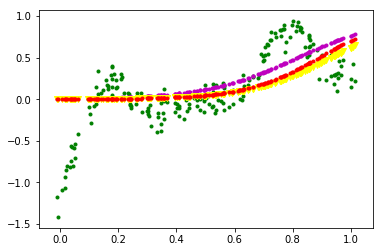

In [41]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='m')
plt.scatter(x, Y, marker='v', color='yellow')
plt.scatter(x, a1_, marker='.', color='r')